In [63]:
# import libraries
import zipfile
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Extract Data

In [64]:
# Defining the path to your zip file
zip_file_path = 'data/movies.csv.zip'

# Defining the extraction destination
extract_to = 'data/'

# Creating the destination folder if it doesn't exist
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted {zip_file_path} to {extract_to}")

Extracted data/movies.csv.zip to data/


# Read Data

In [65]:
df = pd.read_csv('data/movies.csv')

In [66]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [68]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [69]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [70]:
df[df['runtime'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
6195,One for the Money,PG-13,Action,2012,"January 27, 2012 (United States)",5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162.0,Lakeshore Entertainment,NaN
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN


Mean Runtime of the dataset can be used to fill the null values

In [71]:
df[df['country'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN
7615,Clinton Road,NaN,Horror,2019,"June 14, 2019 (United States)",5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000.0,50400.0,Growing Tree Productions,77.0


'Country' column can be filled and checked using the 'realeased' column.

In [72]:
df[df['score'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7661,Love by Drowning,R,Drama,2020,"November 6, 2020 (United States)",NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


This data can be dropped from the dataset

In [73]:
df[df['company'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
408,A Night in Heaven,R,Drama,1983,"November 18, 1983 (United States)",4.3,1200.0,John G. Avildsen,Joan Tewkesbury,Christopher Atkins,United States,NaN,5563663.0,NaN,83.0
464,White Star,NaN,Drama,1983,"March 8, 1985 (West Germany)",6.0,235.0,Roland Klick,Karen Jaehne-Lathan,Dennis Hopper,West Germany,100000.0,NaN,NaN,92.0
469,Last Plane Out,PG,Action,1983,"September 23, 1983 (United States)",4.5,131.0,David Nelson,Ernest Tidyman,Jan-Michael Vincent,United States,NaN,NaN,NaN,92.0
633,The Bear,PG,Biography,1984,"September 28, 1984 (United States)",6.1,270.0,Richard C. Sarafian,Michael Kane,Gary Busey,United States,221000.0,2687148.0,NaN,110.0
969,Modern Girls,PG-13,Comedy,1986,"November 7, 1986 (United States)",5.8,1300.0,Jerry Kramer,Laurie Craig,Daphne Zuniga,United States,NaN,604849.0,NaN,84.0
1033,P.O.W. the Escape,R,Action,1986,"April 4, 1986 (United States)",5.0,533.0,Gideon Amir,Malcolm Barbour,David Carradine,United States,NaN,2497233.0,NaN,90.0
1572,Heart of Dixie,PG,Drama,1989,"August 25, 1989 (United States)",5.2,677.0,Martin Davidson,Anne Rivers Siddons,Ally Sheedy,United States,8000000.0,1097333.0,NaN,95.0
1594,Lost Angels,R,Drama,1989,"May 5, 1989 (United States)",6.0,881.0,Hugh Hudson,Michael Weller,Donald Sutherland,United States,NaN,1247946.0,NaN,116.0
1630,Staying Together,R,Comedy,1989,"November 10, 1989 (United States)",6.2,761.0,Lee Grant,Monte Merrick,Sean Astin,United States,NaN,4348025.0,NaN,91.0
1806,Streets,R,Action,1990,"January 19, 1990 (United States)",5.7,712.0,Katt Shea,Andy Ruben,Christina Applegate,United States,NaN,1510053.0,NaN,85.0


In [74]:
df[['director', 'company']][df['company'].notna()]

,director,company
0,Stanley Kubrick,Warner Bros.
1,Randal Kleiser,Columbia Pictures
2,Irvin Kershner,Lucasfilm
3,Jim Abrahams,Paramount Pictures
4,Harold Ramis,Orion Pictures
...,...,...
7660,Stefan C. Schaefer,Abominable Pictures
7661,Justin Kreinbrink,Dow Jazz Films
7664,Dusty Dukatz,Cactus Blue Entertainment
7665,Nkanya Nkwai,Embi Productions


In [75]:
# Create a new dataframe showing director-company collaborations
director_company_df = df[['director', 'company']].dropna()

# Count how many times each director has worked with each company
director_company_count = director_company_df.groupby(['director', 'company']).size().reset_index(name='collaboration_count')

# Sort by collaboration count in descending order
director_company_count = director_company_count.sort_values('collaboration_count', ascending=False)

In [76]:
director_company_count

,director,company,collaboration_count
1087,Clint Eastwood,Warner Bros.,15
6556,Woody Allen,Jack Rollins & Charles H. Joffe Productions,11
3611,Lars von Trier,Zentropa Entertainments,9
2505,James Ivory,Merchant Ivory Productions,8
5966,Steven Spielberg,Dreamworks Pictures,8
...,...,...,...
6618,Éric Rohmer,Canal+,1
381,Antoinette Jadaone,ABS-CBN Film Productions,1
382,Anton Corbijn,Becker Films,1
6621,Éric Rohmer,Ministère de la Culture et de la Communication,1


In [77]:
# Group by director and find the maximum collaboration count for each director
max_collaborations = director_company_count.groupby('director')['collaboration_count'].max().reset_index()

# Merge this back with original dataframe to identify rows with maximum collaboration counts
director_max_collab = pd.merge(
    director_company_count,
    max_collaborations,
    on=['director', 'collaboration_count'],
    how='inner'
)

# Sort by collaboration_count in descending order to see the strongest partnerships
director_max_collab = director_max_collab.sort_values('collaboration_count', ascending=False)
director_max_collab = director_max_collab[director_max_collab['collaboration_count'] > 2]

# Display the top partnerships
print(f"Found {len(director_max_collab)} director-company pairs with maximum collaboration counts")
director_max_collab

Found 162 director-company pairs with maximum collaboration counts


,director,company,collaboration_count
0,Clint Eastwood,Warner Bros.,15
1,Woody Allen,Jack Rollins & Charles H. Joffe Productions,11
2,Lars von Trier,Zentropa Entertainments,9
3,James Ivory,Merchant Ivory Productions,8
4,Steven Spielberg,Dreamworks Pictures,8
...,...,...,...
157,Wim Wenders,Road Movies Filmproduktion,3
159,John Glen,Eon Productions,3
160,John Landis,Universal Pictures,3
161,Éric Rohmer,Compagnie Eric Rohmer (CER),3


These Directors really love these Production Companies

In [78]:
df[df['star'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
474,The Business of Show Business,NaN,History,1983,"February 15, 1983 (Canada)",8.3,79.0,Tom Logan,Tom Logan,NaN,Canada,323562.0,NaN,CTV,55.0


In [79]:
df[df['gross'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
27,Raise the Titanic,PG,Action,1980,"August 1, 1980 (United States)",5.0,4100.0,Jerry Jameson,Adam Kennedy,Jason Robards,United Kingdom,36000000.0,NaN,ITC Films,115.0
41,Breaker Morant,PG,Drama,1980,"July 3, 1980 (Australia)",7.9,13000.0,Bruce Beresford,Jonathan Hardy,Edward Woodward,Australia,NaN,NaN,The South Australian Film Corporation,107.0
47,The Boogey Man,R,Horror,1980,"November 7, 1980 (United States)",4.6,3900.0,Ulli Lommel,Ulli Lommel,Suzanna Love,United States,300000.0,NaN,The Jerry Gross Organization,82.0
49,Lion of the Desert,PG,Biography,1980,"May 16, 1981 (Japan)",8.3,15000.0,Moustapha Akkad,David Butler,Anthony Quinn,Libya,35000000.0,NaN,Falcon International Productions,173.0
52,Can't Stop the Music,PG,Biography,1980,"June 20, 1980 (United States)",4.2,3700.0,Nancy Walker,Bronte Woodard,Ray Simpson,United States,20000000.0,NaN,EMI Films,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [80]:
df[df['budget'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


This data needs to be dropped for further analysis

# Data Cleaning

In [81]:
# Creating a copy of the original dataframe for data cleaning
new_df = df.copy()

In [82]:
new_df['runtime'] = new_df['runtime'].fillna(new_df['runtime'].mean())

In [83]:
# Create a function to fill ratings by genre
def fill_rating_by_genre(row):
    if pd.isna(row['rating']):
        # Get the mode rating for this genre
        genre_mode = new_df[new_df['genre'] == row['genre']]['rating'].mode()
        if not genre_mode.empty:
            return genre_mode[0]
    return row['rating']

# Apply the function to fill ratings based on genre
new_df['rating'] = new_df.apply(fill_rating_by_genre, axis=1)

# For any remaining NaN values, use the overall mode as fallback
if new_df['rating'].isna().any():
    new_df['rating'] = new_df['rating'].fillna(new_df['rating'].mode()[0])

In [84]:
new_df['released'] = new_df['released'].fillna(str(new_df['year']) +'('+ str(new_df['country'])+')')

In [85]:
new_df.head(1)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0


In [86]:
def extract_country(released):
    if pd.isna(released):
        return None
    
    # Extract text between the last opening and closing parentheses
    start = released.rfind('(')
    end = released.rfind(')')
    
    if start != -1 and end != -1 and start < end:
        return released[start+1:end]
    else:
        return None

# Extract the country from the released column
new_df['country'] = new_df['released'].apply(extract_country)

print(new_df[['released', 'country']].head(10))

                            released        country
0      June 13, 1980 (United States)  United States
1       July 2, 1980 (United States)  United States
2      June 20, 1980 (United States)  United States
3       July 2, 1980 (United States)  United States
4      July 25, 1980 (United States)  United States
5        May 9, 1980 (United States)  United States
6      June 20, 1980 (United States)  United States
7  December 19, 1980 (United States)  United States
8      June 19, 1981 (United States)  United States
9       May 16, 1980 (United States)  United States


In [87]:
new_df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          3
votes          3
director       0
writer         3
star           1
country        0
budget      2171
gross        189
company       17
runtime        0
dtype: int64

In [88]:
# Creating a new dataframe with no missing values
new_df = new_df.dropna().reset_index(drop=True)

In [89]:
new_df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [90]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5434 non-null   object 
 1   rating    5434 non-null   object 
 2   genre     5434 non-null   object 
 3   year      5434 non-null   int64  
 4   released  5434 non-null   object 
 5   score     5434 non-null   float64
 6   votes     5434 non-null   float64
 7   director  5434 non-null   object 
 8   writer    5434 non-null   object 
 9   star      5434 non-null   object 
 10  country   5434 non-null   object 
 11  budget    5434 non-null   float64
 12  gross     5434 non-null   float64
 13  company   5434 non-null   object 
 14  runtime   5434 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 636.9+ KB


In [91]:
new_df.describe()

,year,score,votes,budget,gross,runtime
count,5434.000000,5434.000000,5.434000e+03,5.434000e+03,5.434000e+03,5434.000000
mean,2001.657159,6.392915,1.149532e+05,3.595035e+07,1.030417e+08,108.158311
std,10.539613,0.963233,1.842463e+05,4.155080e+07,1.871295e+08,18.122177
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.068192e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.674427e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.119868e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [92]:
new_df['budget'] = new_df['budget'].astype('int64')

In [93]:
new_df['gross'] = new_df['gross'].astype('int64')

In [94]:
new_df.sort_values('gross', ascending=False, inplace=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3741,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
5314,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
1800,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
4741,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
5170,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,South Korea,5000000,2970,Trimark Pictures,97.0
2293,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
154,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
1377,Madadayo,R,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


# Check Duplicates

In [95]:
# Check for duplicates in the entire dataframe
duplicate_rows = new_df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

# Check for duplicates based on specific columns (like movie name and year)
duplicate_movies = new_df.duplicated(subset=['name', 'year']).sum()
print(f"Movies with duplicate name and year: {duplicate_movies}")

# If there are duplicates, let's see what they are
if duplicate_movies > 0:
    print("\nDuplicate movies (same name and year):")
    duplicates = new_df[new_df.duplicated(subset=['name', 'year'], keep=False)]
    display(duplicates.sort_values(by=['name', 'year']))

# Check for duplicates based on name only
duplicate_names = new_df.duplicated(subset=['name']).sum()
print(f"\nMovies with duplicate names: {duplicate_names}")

# If there are name duplicates, let's see a sample
if duplicate_names > 0:
    name_dups = new_df[new_df.duplicated(subset=['name'], keep=False)]
    print("\nSample of movies with duplicate names:")
    display(name_dups.sort_values(by=['name']).head(10))

Total duplicate rows: 0
Movies with duplicate name and year: 0

Movies with duplicate names: 85

Sample of movies with duplicate names:


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
3976,A Nightmare on Elm Street,R,Crime,2010,"April 30, 2010 (United States)",5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000,115695182,New Line Cinema,95.0
265,A Nightmare on Elm Street,R,Horror,1984,"November 16, 1984 (United States)",7.5,212000.0,Wes Craven,Wes Craven,Heather Langenkamp,United States,1800000,25507137,New Line Cinema,91.0
5347,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United States,183000000,1050693953,Walt Disney Pictures,128.0
1127,Aladdin,G,Animation,1992,"November 25, 1992 (United States)",8.0,382000.0,Ron Clements,Ron Clements,Scott Weinger,United States,28000000,504050219,Walt Disney Pictures,90.0
1919,Anna Karenina,PG-13,Drama,1997,"April 4, 1997 (United States)",6.3,5600.0,Bernard Rose,Lev Tolstoy,Sophie Marceau,United States,35000000,858553,Icon Entertainment International,108.0
4288,Anna Karenina,R,Drama,2012,"September 7, 2012 (United Kingdom)",6.6,95000.0,Joe Wright,Tom Stoppard,Keira Knightley,United Kingdom,40600000,68929150,Universal Pictures,129.0
4586,Annie,PG,Comedy,2014,"December 19, 2014 (United States)",5.3,35000.0,Will Gluck,Will Gluck,Quvenzhané Wallis,United States,65000000,136853506,Marcy Media,118.0
111,Annie,PG,Comedy,1982,"June 18, 1982 (United States)",6.6,41000.0,John Huston,Carol Sobieski,Aileen Quinn,United States,50000000,57063861,Columbia Pictures,127.0
1641,Bad Company,R,Crime,1995,"January 20, 1995 (United States)",5.4,2800.0,Damian Harris,Ross Thomas,Ellen Barkin,United States,15000000,3674841,Touchstone Pictures,108.0
2723,Bad Company,PG-13,Action,2002,"June 7, 2002 (United States)",5.6,45000.0,Joel Schumacher,Gary M. Goodman,Anthony Hopkins,United States,70000000,66200782,Touchstone Pictures,116.0


This Duplicates are Real, which means they are remakes with the same name.

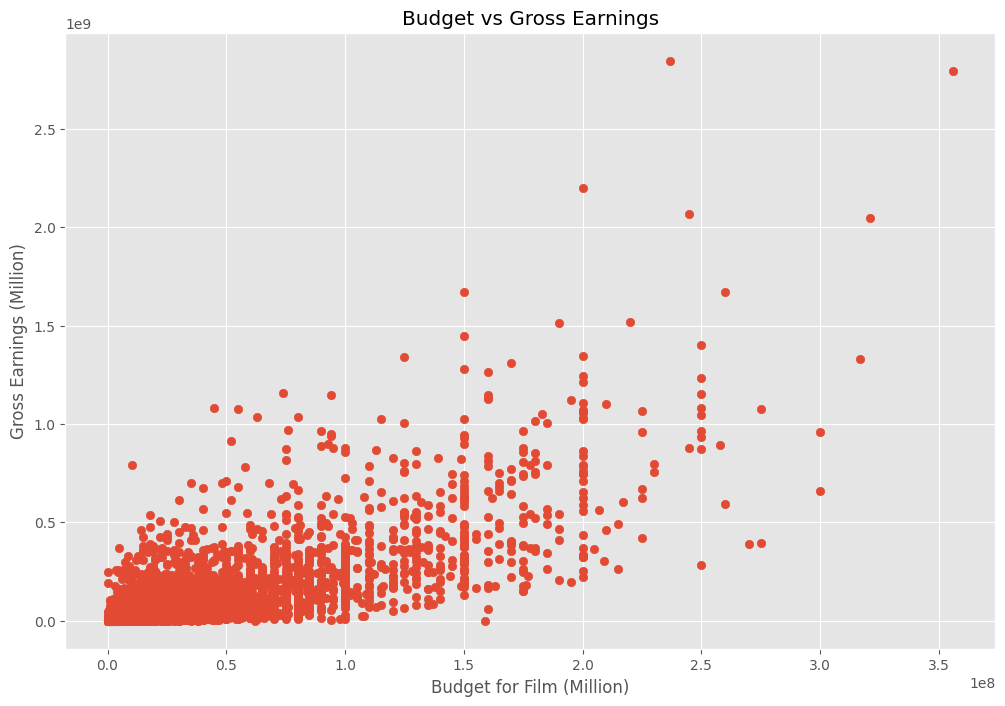

In [96]:
plt.scatter(x = new_df['budget'], y = new_df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film (Million)')
plt.ylabel('Gross Earnings (Million)')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

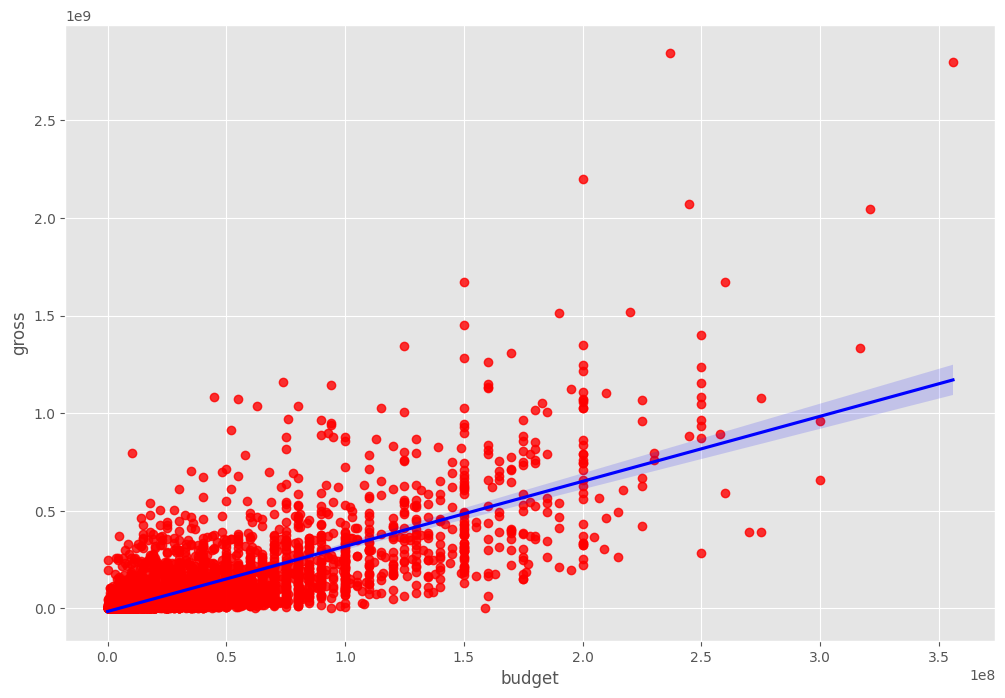

In [97]:
sns.regplot(x='budget', y='gross', data=new_df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [98]:
numeric_df = new_df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.054837,0.205524,0.327531,0.274101,0.074091
score,0.054837,1.000000,0.473738,0.071609,0.222034,0.414463
votes,0.205524,0.473738,1.000000,0.439925,0.614858,0.352406
budget,0.327531,0.071609,0.439925,1.000000,0.740364,0.318571
gross,0.274101,0.222034,0.614858,0.740364,1.000000,0.275562
runtime,0.074091,0.414463,0.352406,0.318571,0.275562,1.000000


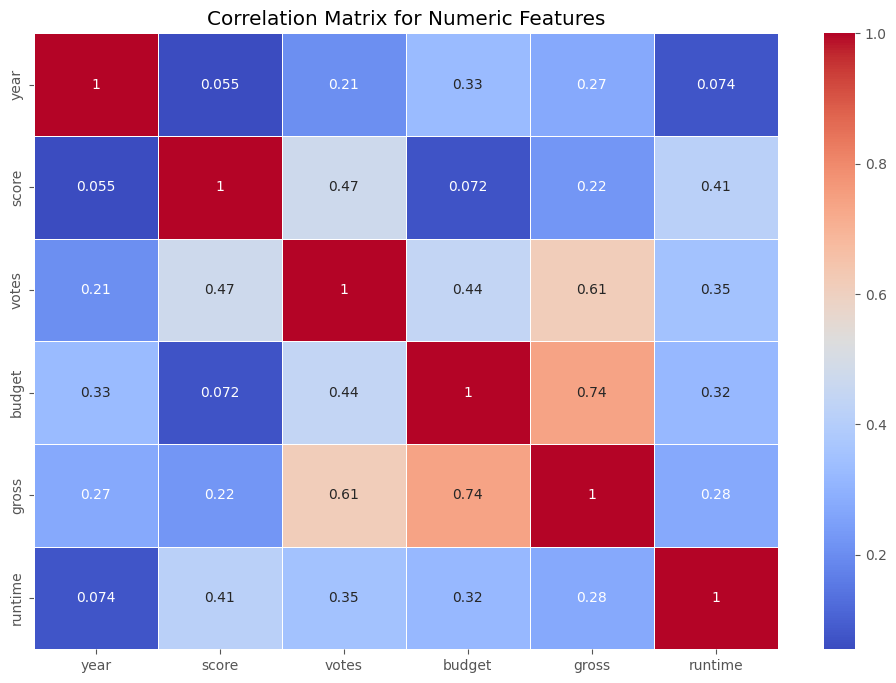

In [99]:
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.show()

High Budget Movies tends to earn High Gross, Votes also play a few vital role in Gross Earning of the movies

In [100]:
new_df_encoded = new_df

for col_name in new_df_encoded.columns:
    if(new_df_encoded[col_name].dtype == 'object'):
        new_df_encoded[col_name]= new_df_encoded[col_name].astype('category')
        new_df_encoded[col_name] = new_df_encoded[col_name].cat.codes

In [101]:
new_df_encoded.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4704,6,6,1980,1308,8.4,927000.0,1798,2840,700,47,19000000,46998772,1432,146.0
1,3941,6,1,1980,1131,5.8,65000.0,1580,1159,215,47,4500000,58853106,454,104.0
2,3653,4,0,1980,1363,8.7,1200000.0,759,1821,1161,47,18000000,538375067,949,124.0
3,205,4,4,1980,1131,7.7,221000.0,891,1415,1478,47,3500000,83453539,1114,88.0
4,734,6,4,1980,1174,7.3,108000.0,721,351,272,47,6000000,39846344,1089,98.0


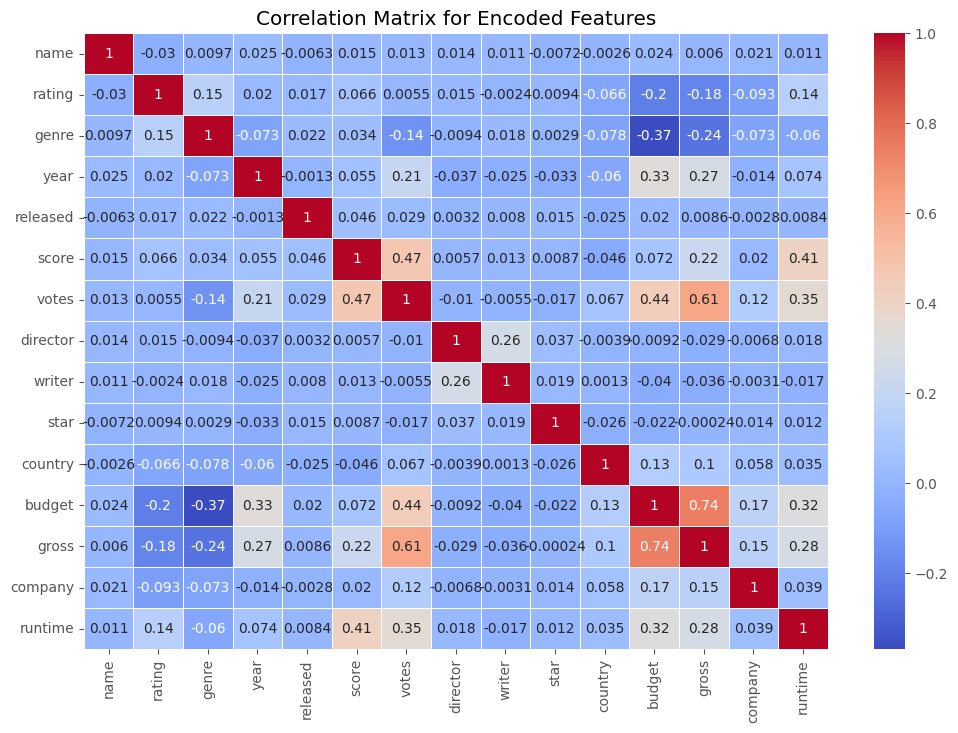

In [102]:
new_corr = new_df_encoded.corr()
sns.heatmap(new_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Encoded Features')
plt.show()

In [103]:
corr_mat = new_df_encoded.corr()
corr_pairs = corr_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre    budget    -0.368870
budget   genre     -0.368870
gross    genre     -0.244327
genre    gross     -0.244327
rating   budget    -0.204468
                      ...   
budget   budget     1.000000
country  country    1.000000
gross    gross      1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [104]:
sorted_pairs[(sorted_pairs) > 0.5]

votes     gross       0.614858
gross     votes       0.614858
budget    gross       0.740364
gross     budget      0.740364
released  released    1.000000
score     score       1.000000
rating    rating      1.000000
name      name        1.000000
genre     genre       1.000000
year      year        1.000000
director  director    1.000000
votes     votes       1.000000
writer    writer      1.000000
star      star        1.000000
budget    budget      1.000000
country   country     1.000000
gross     gross       1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

Votes and Budget are highly correlated to Gross Earnings